<a href="https://colab.research.google.com/github/RiznoFadhil/uefa-euro-2024-shot-analysis/blob/main/uefa_euro2024_shotxg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Data Extraction

In [29]:
!pip install statsbombpy

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from statsbombpy import sb

In [31]:
competitions = sb.competitions()
competitions.head()

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [32]:
matches = sb.matches(
    competition_id=55,
    season_id=282
)

matches[["match_id", "home_team", "away_team"]].head()

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,home_team,away_team
0,3942819,Netherlands,England
1,3943043,Spain,England
2,3942752,Spain,France
3,3942382,Netherlands,Turkey
4,3942349,Portugal,France


In [33]:
events = sb.events(match_id=3942226)
events.head()

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Germany,770,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:00.000,Half Start,NaN


In [34]:
shots = events[events["type"] == "Shot"].copy()

In [35]:
# Data Cleaning & Feature Engineering

In [36]:
shots["x"] = shots["location"].apply(lambda x: x[0])
shots["y"] = shots["location"].apply(lambda x: x[1])

shots["is_goal"] = shots["shot_outcome"] == "Goal"

In [37]:
shots_df = shots[
    [
        "team",
        "player",
        "x",
        "y",
        "shot_outcome",
        "shot_statsbomb_xg",
        "is_goal"
    ]
]

shots_df.head()

,team,player,x,y,shot_outcome,shot_statsbomb_xg,is_goal
4119,Spain,Pedro González López,101.5,39.7,Saved,0.117437,False
4120,Spain,Nicholas Williams Arthuer,91.9,28.7,Off T,0.021921,False
4121,Spain,Lamine Yamal Nasraoui Ebana,98.9,48.6,Off T,0.084460,False
4122,Spain,Álvaro Borja Morata Martín,100.2,21.9,Blocked,0.013587,False
4123,Spain,Fabián Ruiz Peña,98.6,41.5,Off T,0.068609,False


In [38]:
# Shot Map of Spain (vs Germany in Quarter Final)

In [39]:
def draw_statsbomb_pitch(ax):
    # outer lines
    ax.plot([0,120],[0,0], color="black")
    ax.plot([120,120],[0,80], color="black")
    ax.plot([120,0],[80,80], color="black")
    ax.plot([0,0],[80,0], color="black")

    # right penalty box
    ax.add_patch(patches.Rectangle((102,18),18,44, fill=False))
    ax.add_patch(patches.Rectangle((114,30),6,20, fill=False))
    ax.add_patch(patches.Rectangle((120,36),2,8, fill=False))

    # left penalty box
    ax.add_patch(patches.Rectangle((0,18),18,44, fill=False))
    ax.add_patch(patches.Rectangle((0,30),6,20, fill=False))
    ax.add_patch(patches.Rectangle((-2,36),2,8, fill=False))

    # halfway line
    ax.plot([60,60],[0,80], color="black")

    # center circle
    ax.add_patch(patches.Circle((60,40),9, fill=False, color="black"))

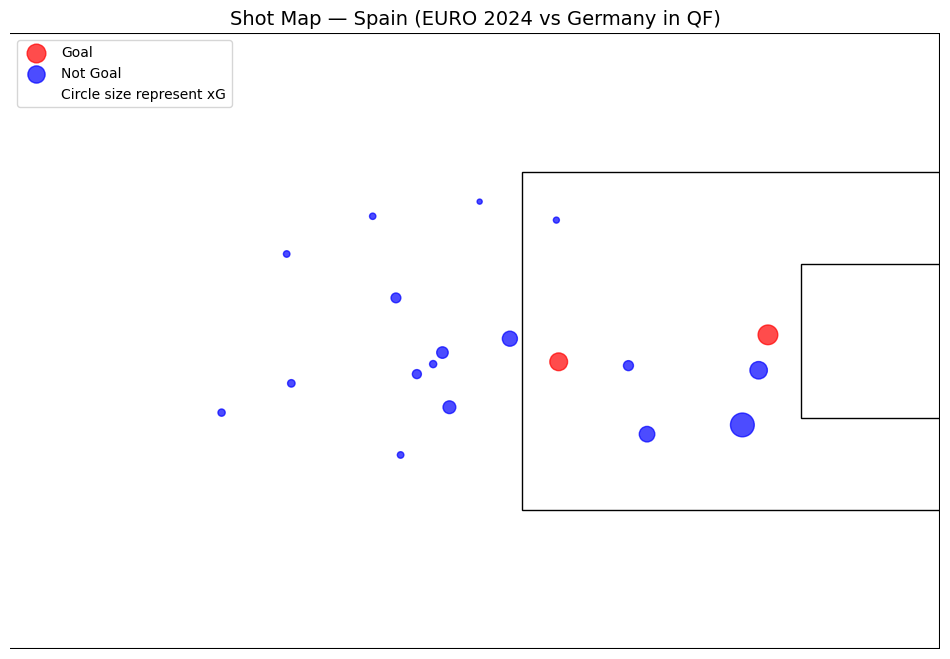

In [40]:
team = "Spain"
team_shots = shots_df[shots_df["team"] == team]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(80, 120)
ax.set_ylim(80, 0)
ax.axis("off")

draw_statsbomb_pitch(ax)

# Plot goals
goals = team_shots[team_shots["is_goal"] == True]
ax.scatter(
    goals["x"],
    goals["y"],
    s=goals["shot_statsbomb_xg"] * 1000,
    c="red",
    alpha=0.7,
    label="Goal"
)

# Plot non-goals
no_goals = team_shots[team_shots["is_goal"] == False]
ax.scatter(
    no_goals["x"],
    no_goals["y"],
    s=no_goals["shot_statsbomb_xg"] * 1000,
    c="blue",
    alpha=0.7,
    label="Not Goal"
)

# Add an invisible scatter for the xG explanation in the legend
ax.scatter([], [], color='none', marker='o', s=0, label='Circle size represent xG')

ax.set_title(f"Shot Map — {team} (EURO 2024 vs Germany in QF)", fontsize=14)
ax.legend(loc='upper left') # Add the legend
plt.show()

In [41]:
# Match Comparison (Spain vs Germany in Quarter Final)

In [42]:
team_a = "Spain"
team_b = "Germany"

shots_a = shots_df[shots_df["team"] == team_a]
shots_b = shots_df[shots_df["team"] == team_b].copy()

In [43]:
shots_b["x_mirror"] = 120 - shots_b["x"]
shots_b["y_mirror"] = shots_b["y"]

In [44]:
def team_summary(df):
    return {
        "Shots": len(df),
        "Goals": df["is_goal"].sum(),
        "xG": df["shot_statsbomb_xg"].sum()
    }

summary_a = team_summary(shots_a)
summary_b = team_summary(shots_b)

summary_df = pd.DataFrame([summary_a, summary_b], index=[team_a, team_b])
summary_df

,Shots,Goals,xG
Spain,19,2,1.534054
Germany,23,1,1.629075


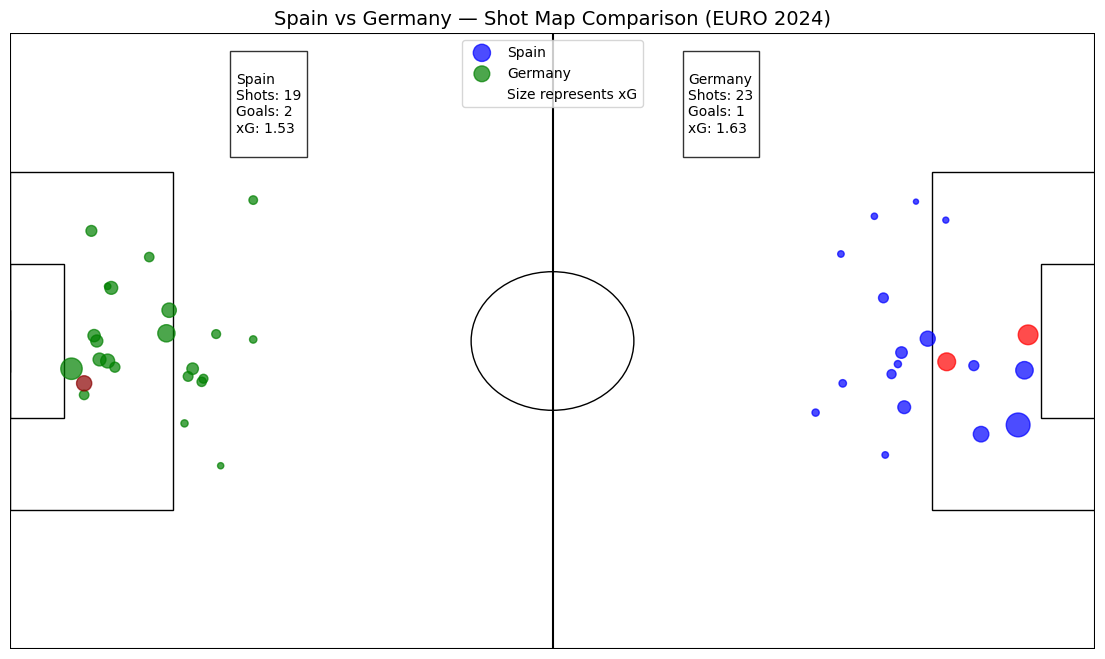

In [45]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 120)
ax.set_ylim(80, 0)
ax.axis("off")

draw_statsbomb_pitch(ax)

# Team A
ax.scatter(
    shots_a["x"],
    shots_a["y"],
    s=shots_a["shot_statsbomb_xg"] * 1000,
    c=shots_a["is_goal"].map({True: "red", False: "blue"}),
    alpha=0.7,
    label=team_a
)

# Team B (mirrored)
ax.scatter(
    shots_b["x_mirror"],
    shots_b["y_mirror"],
    s=shots_b["shot_statsbomb_xg"] * 1000,
    c=shots_b["is_goal"].map({True: "darkred", False: "green"}),
    alpha=0.7,
    label=team_b
)

# Add an invisible scatter for the xG explanation in the legend
ax.scatter([], [], color='none', marker='o', s=0, label='Size represents xG')

ax.legend(loc="upper center")
ax.set_title(
    f"{team_a} vs {team_b} — Shot Map Comparison (EURO 2024)",
    fontsize=14)

text_a = f"""
{team_a}
Shots: {summary_a['Shots']}
Goals: {summary_a['Goals']}
xG: {summary_a['xG']:.2f}
"""

text_b = f"""
{team_b}
Shots: {summary_b['Shots']}
Goals: {summary_b['Goals']}
xG: {summary_b['xG']:.2f}
"""

ax.text(25, 15, text_a, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax.text(75, 15, text_b, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In [46]:
# EURO 2024 Tournament Trends

In [20]:
all_events = []

for mid in matches["match_id"]:
    try:
        ev = sb.events(match_id=mid)
        all_events.append(ev)
    except:
        pass

events_all = pd.concat(all_events, ignore_index=True)

events_all.shape

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: 

(187858, 114)

In [21]:
shots_all = events_all[events_all["type"] == "Shot"].copy()

shots_all["is_goal"] = shots_all["shot_outcome"] == "Goal"

In [22]:
team_summary = (
    shots_all
    .groupby("team")
    .agg(
        total_shots=("team","count"),
        goals=("is_goal","sum"),
        total_xg=("shot_statsbomb_xg","sum"),
        avg_xg=("shot_statsbomb_xg","mean")
    )
    .reset_index()
)

team_summary.sort_values("total_xg", ascending=False).head(10)

,team,total_shots,goals,total_xg,avg_xg
14,Portugal,95,9,14.709344,0.154835
7,France,101,7,12.112084,0.119922
20,Spain,123,14,10.574470,0.085971
6,England,81,13,10.508677,0.129737
9,Germany,95,11,8.725701,0.091849
21,Switzerland,62,11,8.483772,0.136835
12,Netherlands,83,9,7.318485,0.088175
22,Turkey,72,8,6.464623,0.089786
1,Austria,50,6,6.115813,0.122316
3,Croatia,43,2,5.823934,0.135440


In [23]:
team_summary

,team,total_shots,goals,total_xg,avg_xg
0,Albania,32,3,2.183611,0.068238
1,Austria,50,6,6.115813,0.122316
2,Belgium,53,2,4.378128,0.082606
3,Croatia,43,2,5.823934,0.135440
4,Czech Republic,44,3,4.590542,0.104330
5,Denmark,52,2,3.869597,0.074415
6,England,81,13,10.508677,0.129737
7,France,101,7,12.112084,0.119922
8,Georgia,30,4,4.217061,0.140569
9,Germany,95,11,8.725701,0.091849


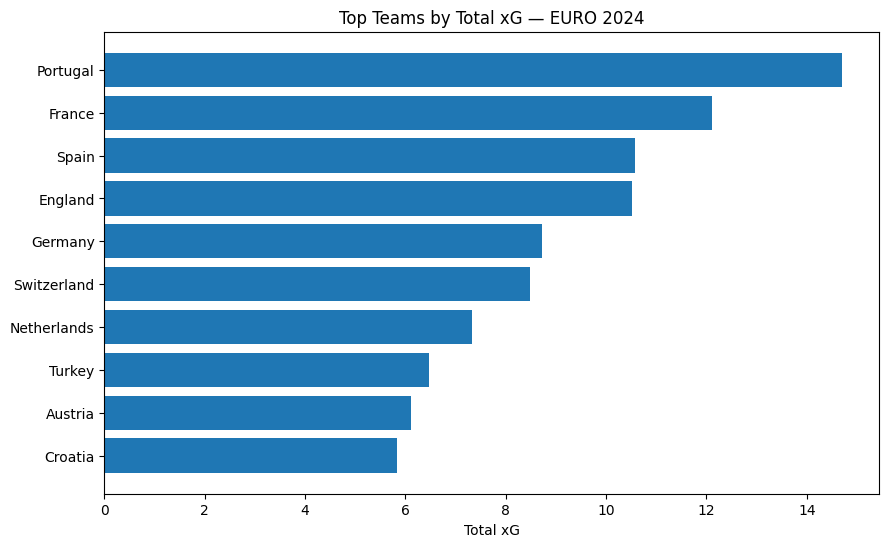

In [24]:
top10 = team_summary.sort_values("total_xg", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["team"], top10["total_xg"])
plt.gca().invert_yaxis()
plt.title("Top Teams by Total xG — EURO 2024")
plt.xlabel("Total xG")
plt.show()

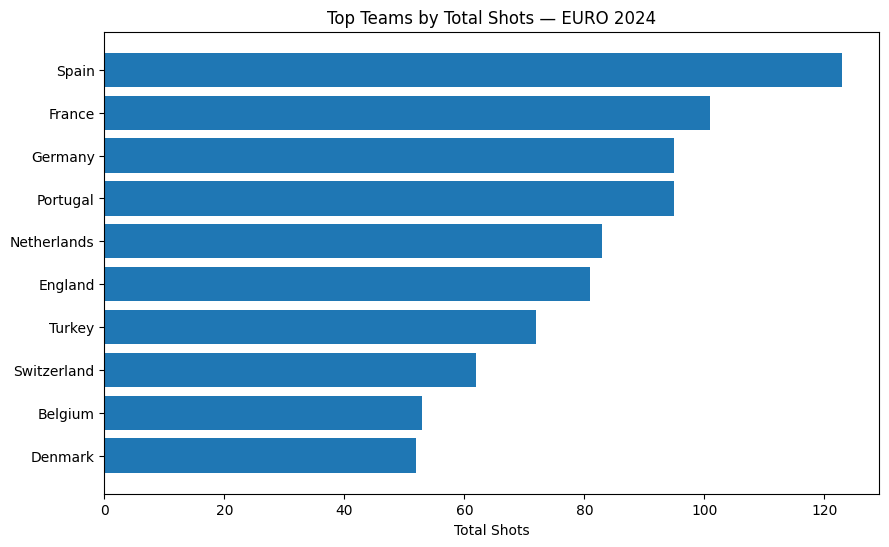

In [25]:
top10shots = team_summary.sort_values("total_shots", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10shots["team"], top10shots["total_shots"])
plt.gca().invert_yaxis()
plt.title("Top Teams by Total Shots — EURO 2024")
plt.xlabel("Total Shots")
plt.show()

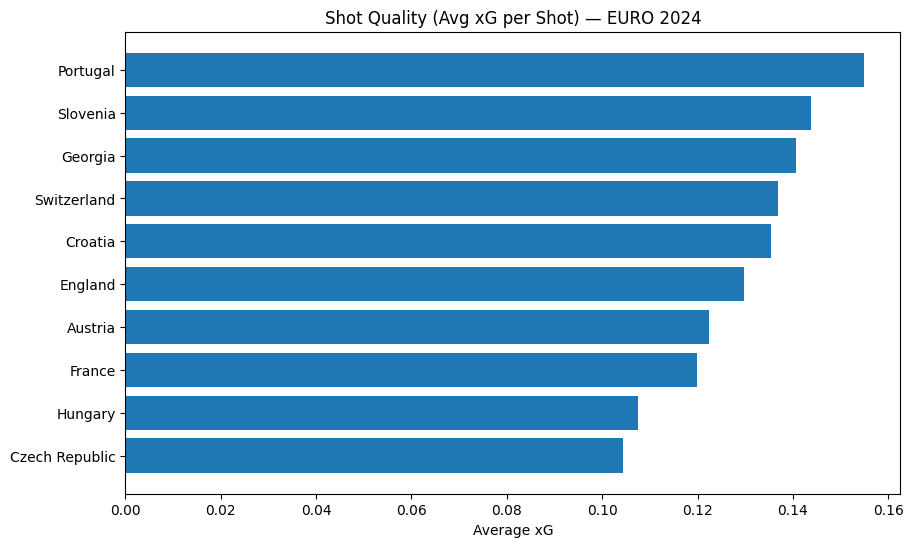

In [26]:
top_quality = team_summary.sort_values("avg_xg", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_quality["team"], top_quality["avg_xg"])
plt.gca().invert_yaxis()
plt.title("Shot Quality (Avg xG per Shot) — EURO 2024")
plt.xlabel("Average xG")
plt.show()

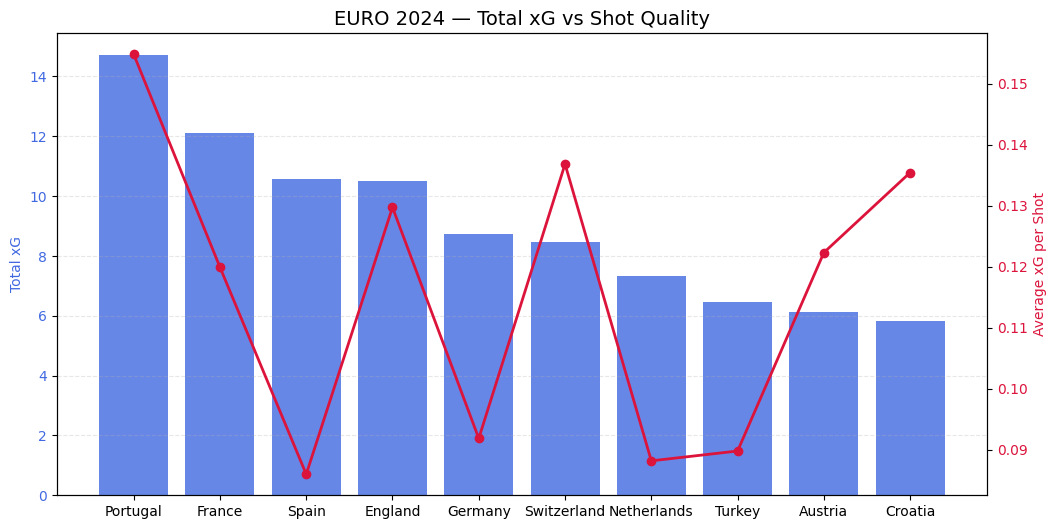

In [27]:
top10 = team_summary.sort_values("total_xg", ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12,6))

# BAR — Total xG

ax1.bar(
    top10["team"],
    top10["total_xg"],
    color="royalblue",
    alpha=0.8,
    label="Total xG"
)
ax1.set_ylabel("Total xG", color="royalblue")
ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.grid(axis="y", linestyle="--", alpha=0.3)

# LINE — Avg xG

ax2 = ax1.twinx()

ax2.plot(
    top10["team"],
    top10["avg_xg"],
    color="crimson",
    marker="o",
    linewidth=2,
    label="Avg xG per Shot"
)
ax2.set_ylabel("Average xG per Shot", color="crimson")
ax2.tick_params(axis='y', labelcolor="crimson")

# STYLE
plt.title("EURO 2024 — Total xG vs Shot Quality", fontsize=14)
plt.xticks(rotation=45)
plt.show()